### Library:

In [372]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

### Load and view dataset:

In [373]:
df=pd.read_csv('final_data.csv')

In [374]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


### Data profiling:

In [375]:
df.shape

(10754, 22)

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [377]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [378]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

## Data Quality Checks:

### 1. Reliability:

In [379]:
# This dataset was generated by scraping data from Transfermarkt

### 2. Timeliness:

In [380]:
# Updated 8 months ago and serves our analysis.

### 3. Consistency:

In [381]:
# Here I made sure that the data set is not incompatible with another data set somewhere else.

### 4. Relevance:

In [382]:
# Sample Appropriateness: Confirm that data sample aligns with analysis objectives.

In [383]:
df.drop('player', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.drop('winger', axis=1, inplace=True)

### 5. Uniqueness:

In [384]:
# there is no duplicated ;)

### 6. Completeness:

In [385]:
#there is no missing data

### 7. Check Accuracy:

In [386]:
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
dtype: object

In [387]:
#find outliers and remove it

In [388]:
categorical_features = ['team', 'position']
numeric_features = ['height', 'age', 'appearance','goals','assists','yellow cards','second yellow cards','red cards','goals conceded','clean sheets',
                   'minutes played','days_injured','games_injured','award','current_value','highest_value','position_encoded']

In [389]:
for i in categorical_features:
    print(df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64


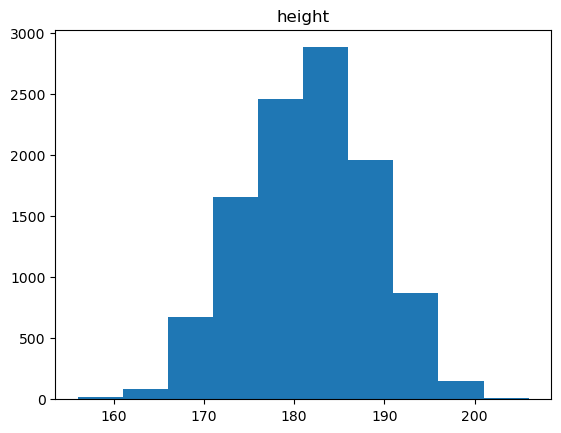

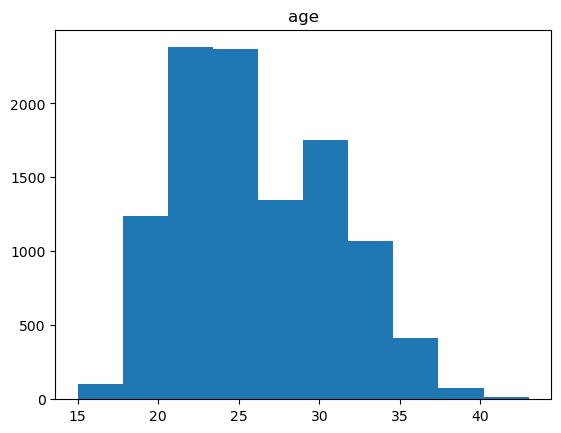

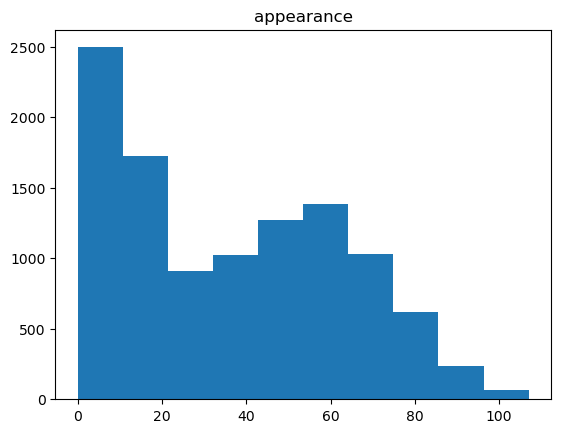

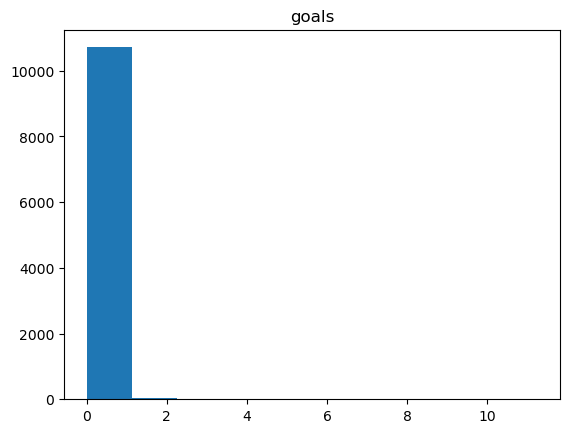

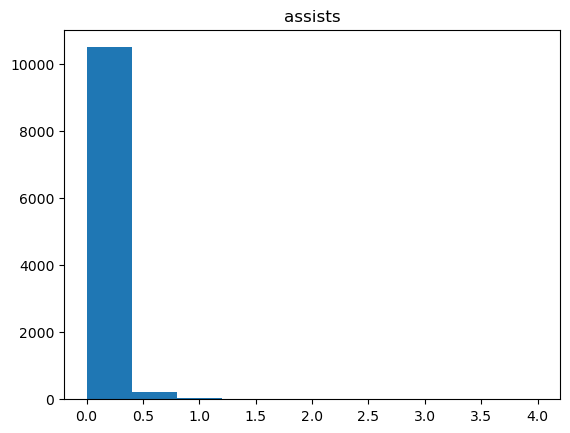

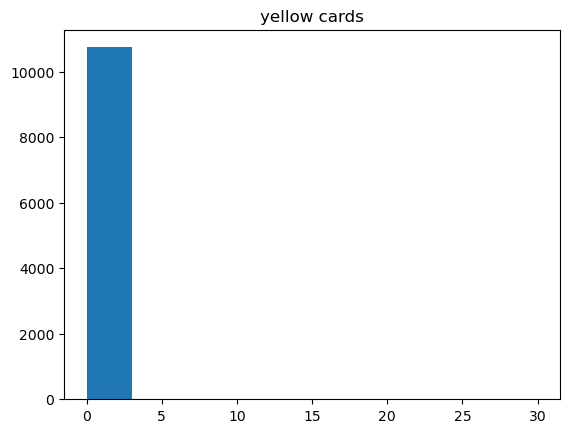

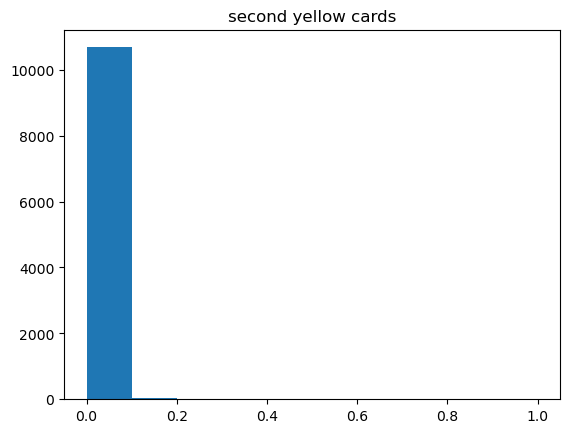

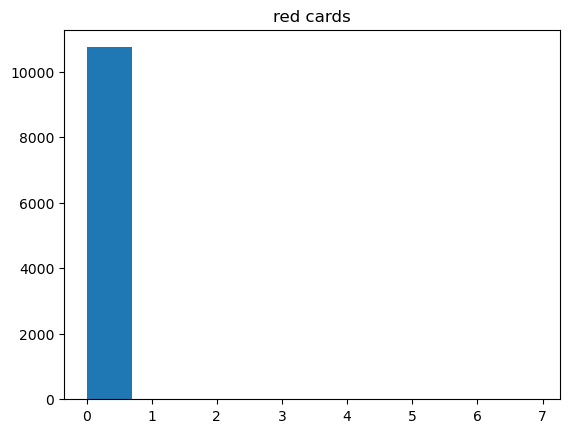

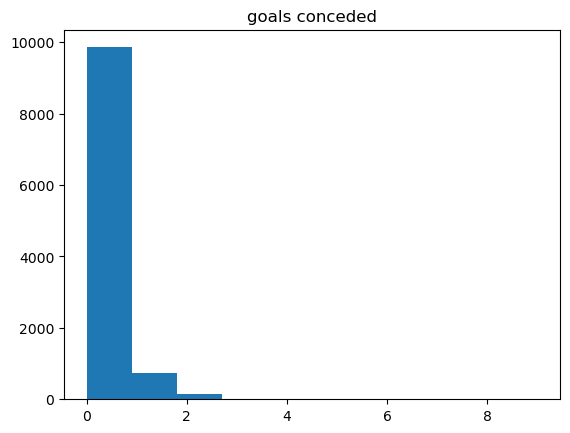

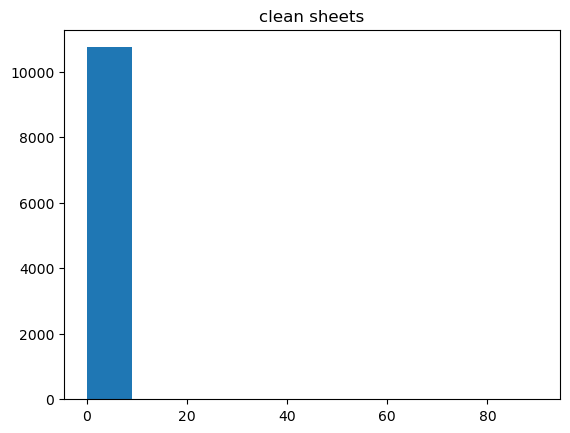

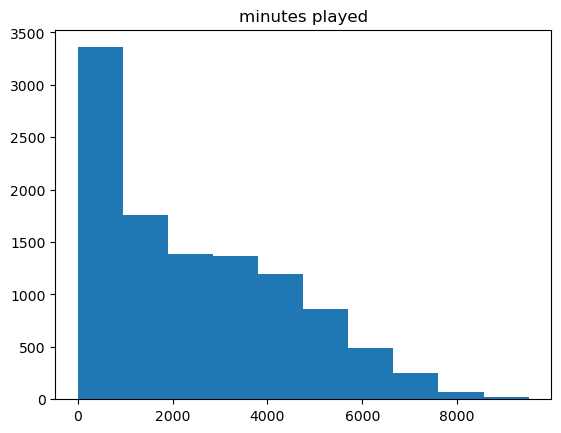

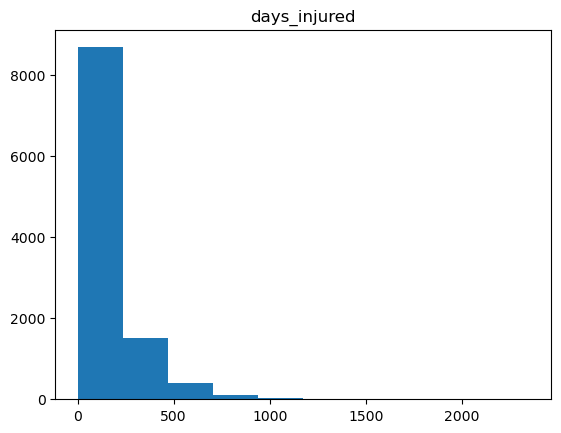

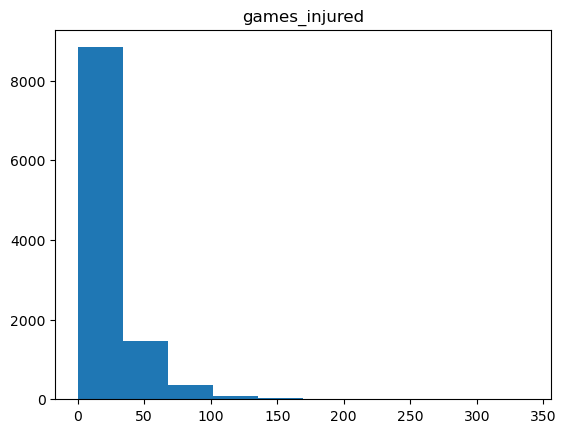

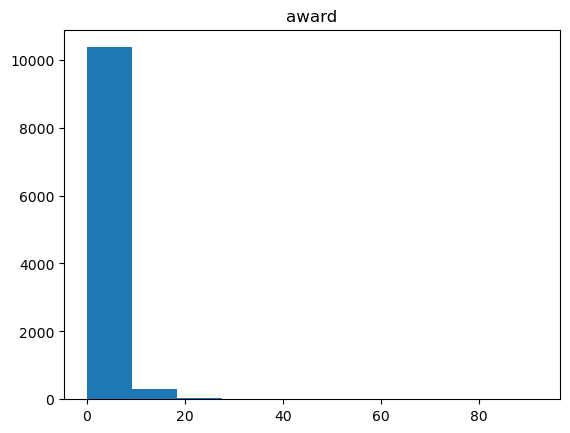

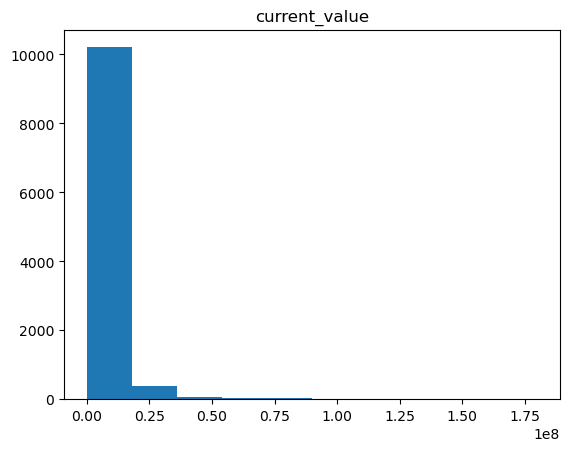

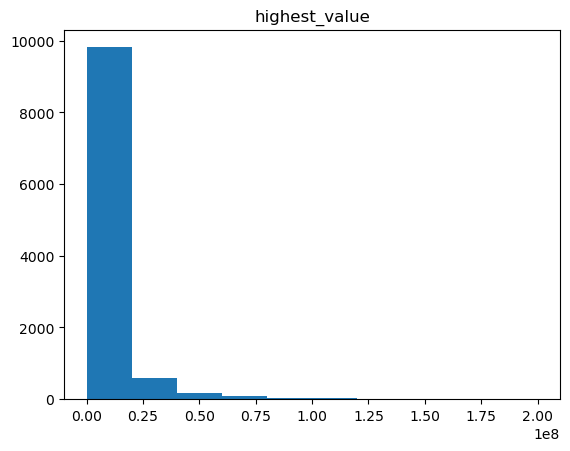

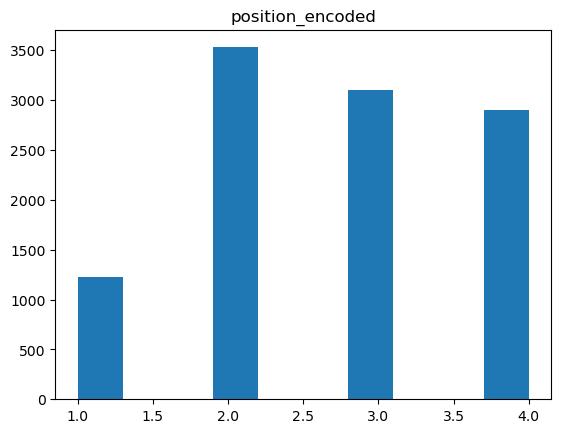

In [390]:
for i in numeric_features:
    plt.hist(df[i]);
    plt.title(i)
    plt.show()

In [391]:
#لما كنت احاول اسوي كذا عشان اقدر احتفظ بالجزء الجديد ما يسمحلي اسويها على كل الكولومز و يطلع ايرور
# df=df[(df['clean sheets'] <= 0.8) & (df['clean sheets'] >= 0.01)]


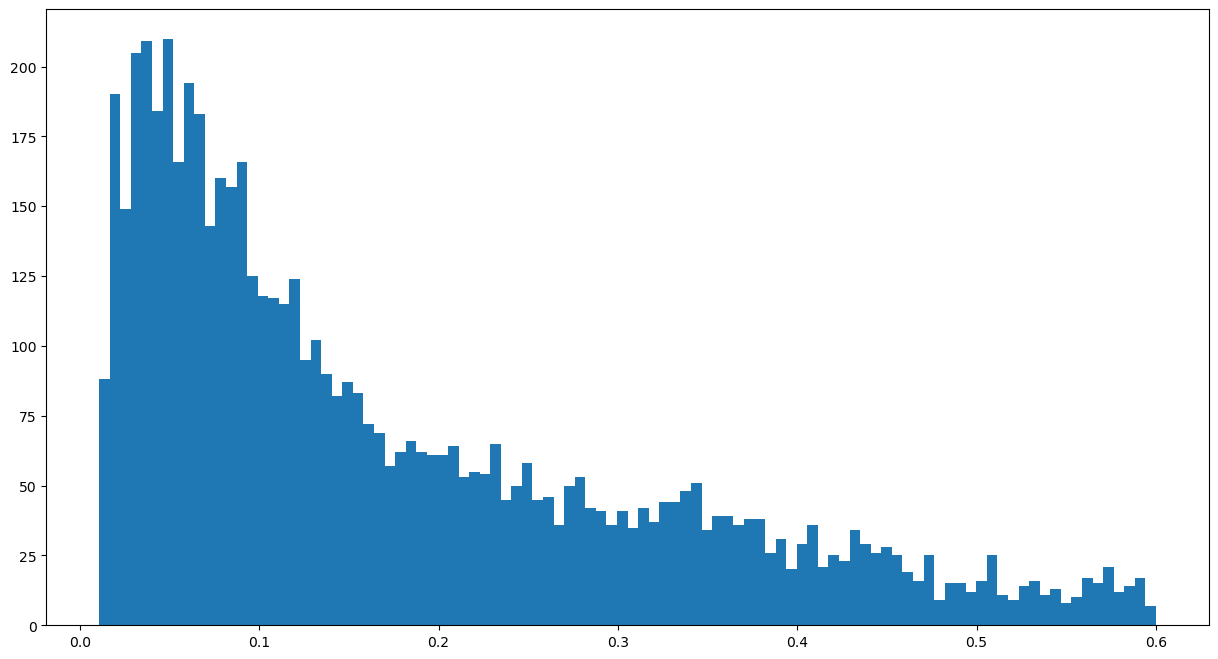

In [392]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['goals']<=0.6) & (df['goals']>=0.01)]['goals'],bins=100);
plt.show()

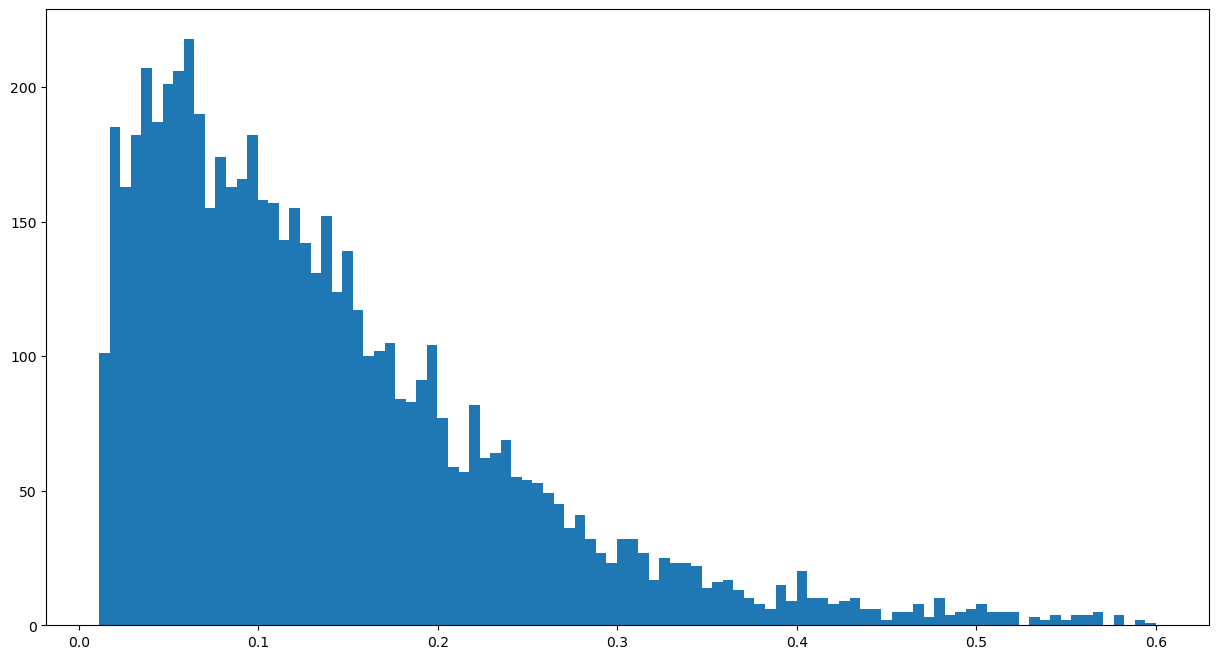

In [393]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['assists']<=0.6) & (df['assists']>=0.01)]['assists'],bins=100);
plt.show()

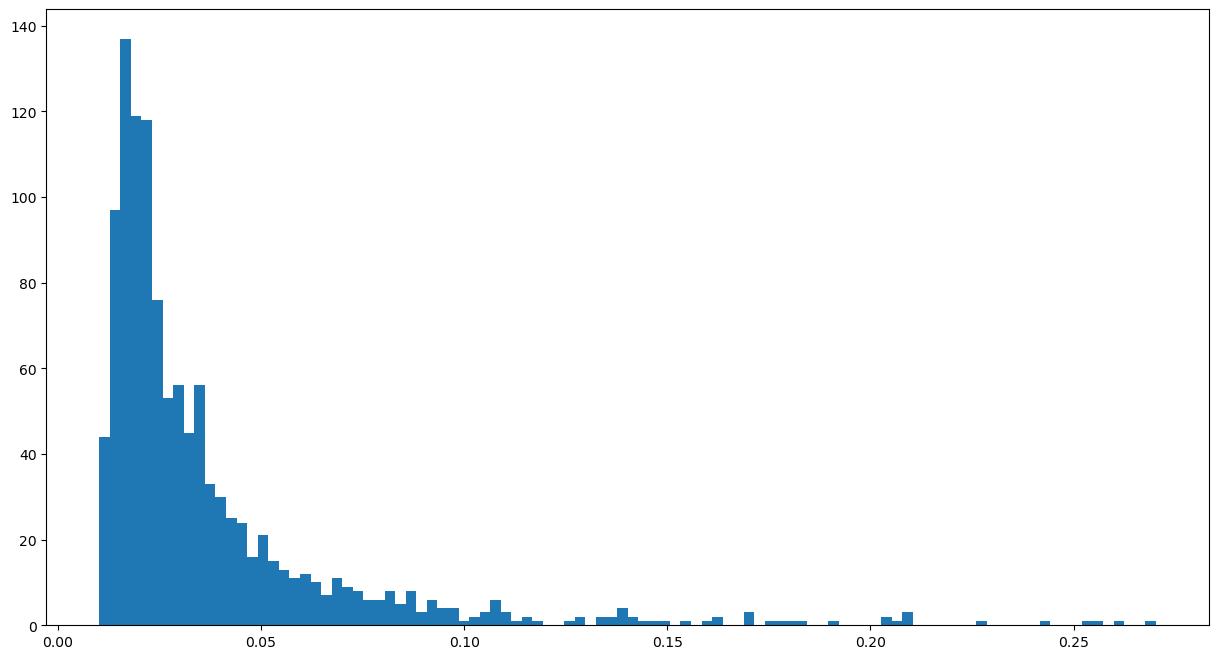

In [394]:
plt.figure(figsize=(15, 8))
plt.hist(df[(df['second yellow cards'] <= 0.3) & (df['second yellow cards'] >= 0.01)]['second yellow cards'], bins=100)
plt.show()

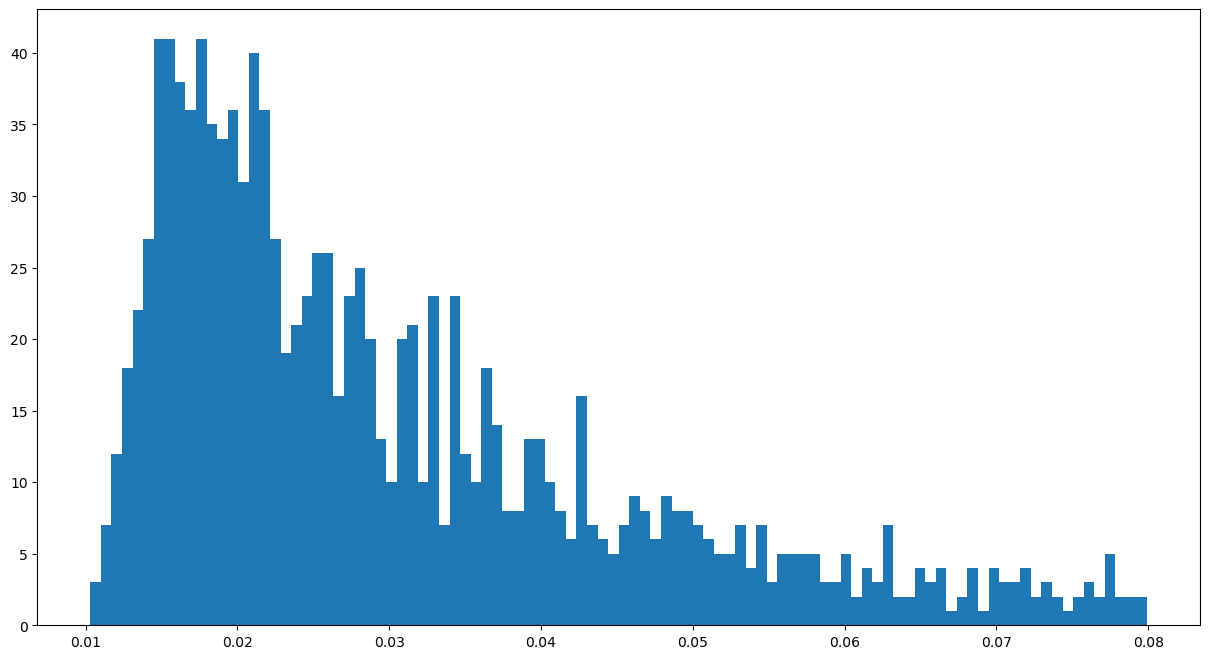

In [395]:
plt.figure(figsize=(15, 8))
plt.hist(df[(df['red cards'] <= 0.08) & (df['red cards'] >= 0.01)]['red cards'], bins=100)
plt.show()

In [396]:
df[(df['clean sheets'] <= 0.8) & (df['clean sheets'] >= 0.01)]

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded
0,Manchester United,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.000000,1.217252,0.335463,9390,42,5,13,15000000,70000000,1
1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000,1
32,West Ham United,Goalkeeper,195.0,30.0,41,0.0,0.0,0.000000,0.0,0.000000,0.898502,0.449251,3606,34,4,16,8000000,17500000,1
33,West Ham United,Goalkeeper,190.0,38.0,75,0.0,0.0,0.040767,0.0,0.000000,1.331723,0.271780,6623,554,99,4,1000000,9000000,1
54,Leicester City,Goalkeeper,191.0,29.0,33,0.0,0.0,0.000000,0.0,0.000000,1.696970,0.242424,2970,127,29,2,8000000,10000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10697,Adelaide United,Goalkeeper,194.0,22.0,54,0.0,0.0,0.074120,0.0,0.018530,1.445337,0.203830,4857,0,0,0,450000,450000,1
10698,Adelaide United,Goalkeeper,188.0,23.0,6,0.0,0.0,0.000000,0.0,0.000000,1.122661,0.374220,481,209,25,0,250000,350000,1
10700,Adelaide United,Goalkeeper,187.0,18.0,3,0.0,0.0,0.000000,0.0,0.000000,1.706161,0.426540,211,0,0,0,50000,50000,1
10727,Western Sydney Wanderers,Goalkeeper,191.0,31.0,51,0.0,0.0,0.019608,0.0,0.000000,1.431373,0.254902,4590,0,0,2,500000,1000000,1


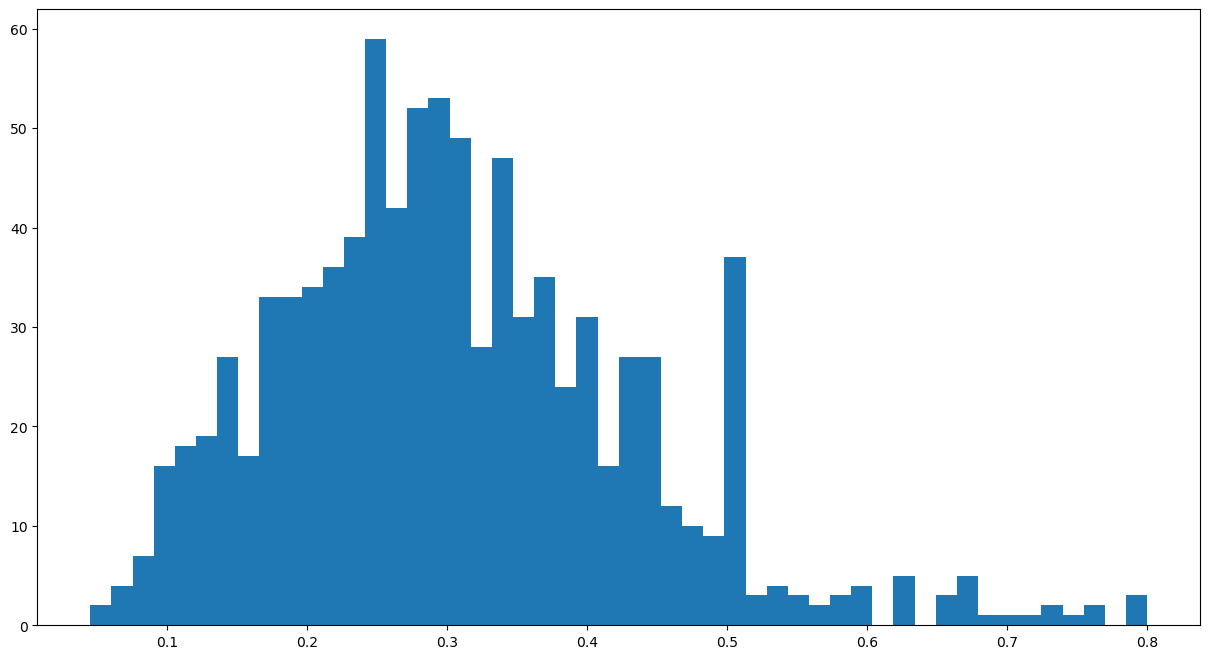

In [397]:
plt.figure(figsize=(15, 8))
plt.hist(df[(df['clean sheets'] <= 0.8) & (df['clean sheets'] >= 0.01)]['clean sheets'], bins=50)
plt.show()

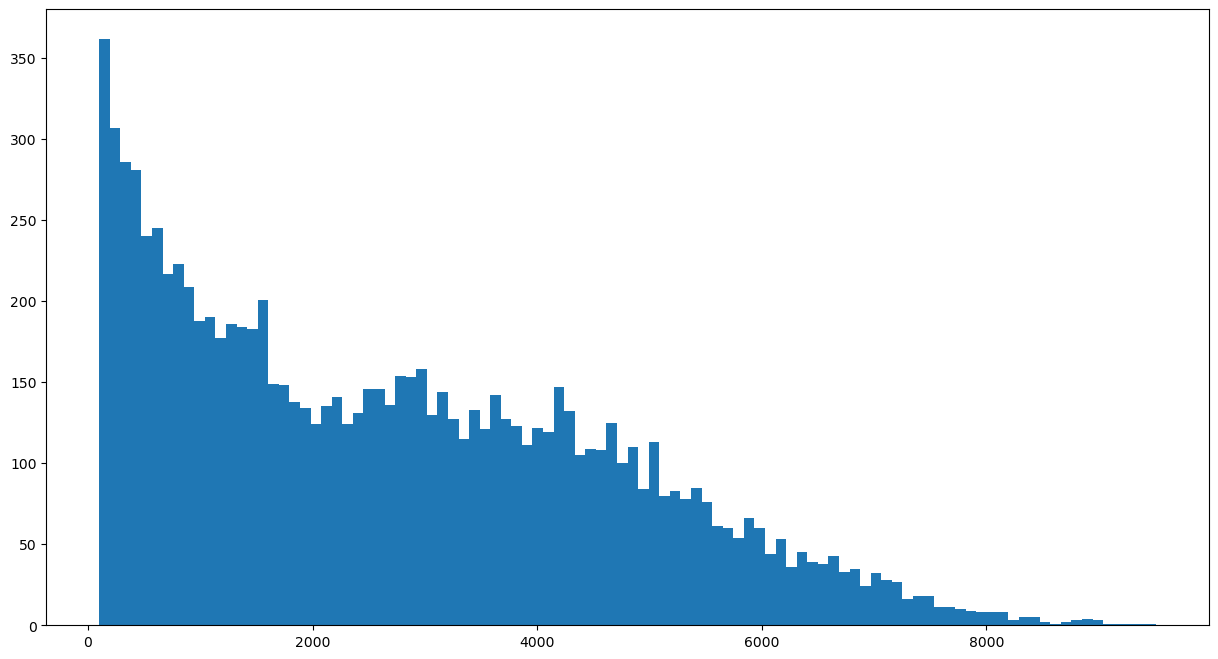

In [398]:
plt.figure(figsize=(15, 8))
plt.hist(df[(df['minutes played'] <= 10000) & (df['minutes played'] >= 100)]['minutes played'], bins=100)
plt.show()


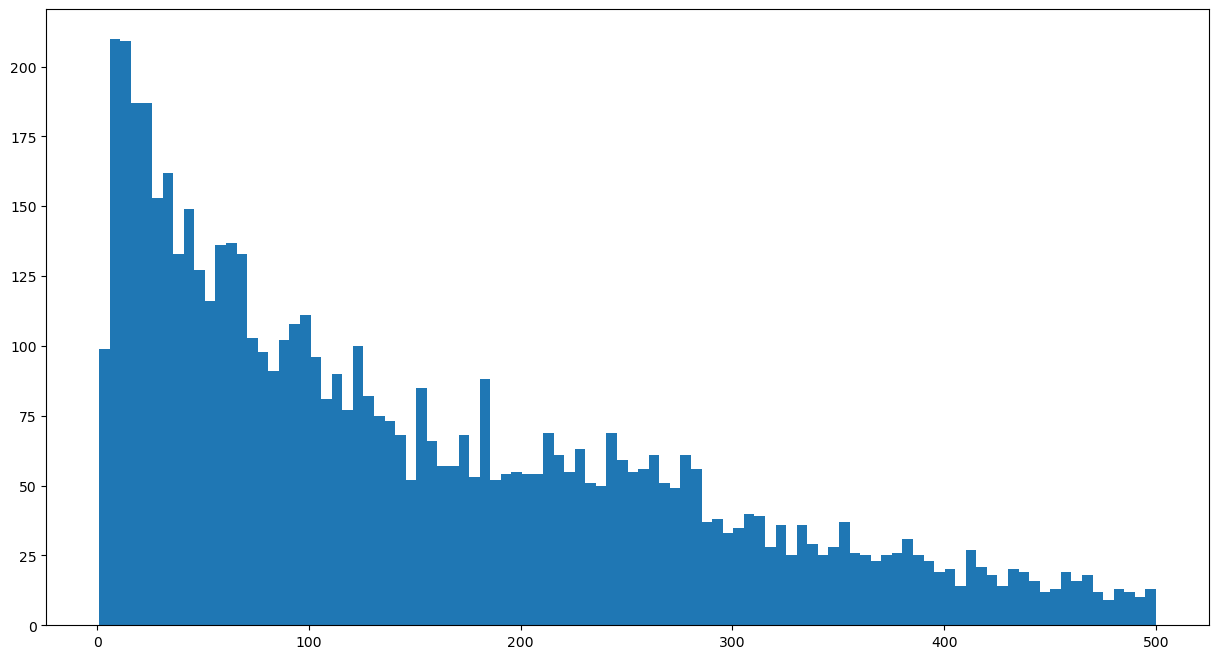

In [399]:
plt.figure(figsize=(15, 8))
plt.hist(df[(df['days_injured'] <= 500) & (df['days_injured'] >= 1)]['days_injured'], bins=100)
plt.show()

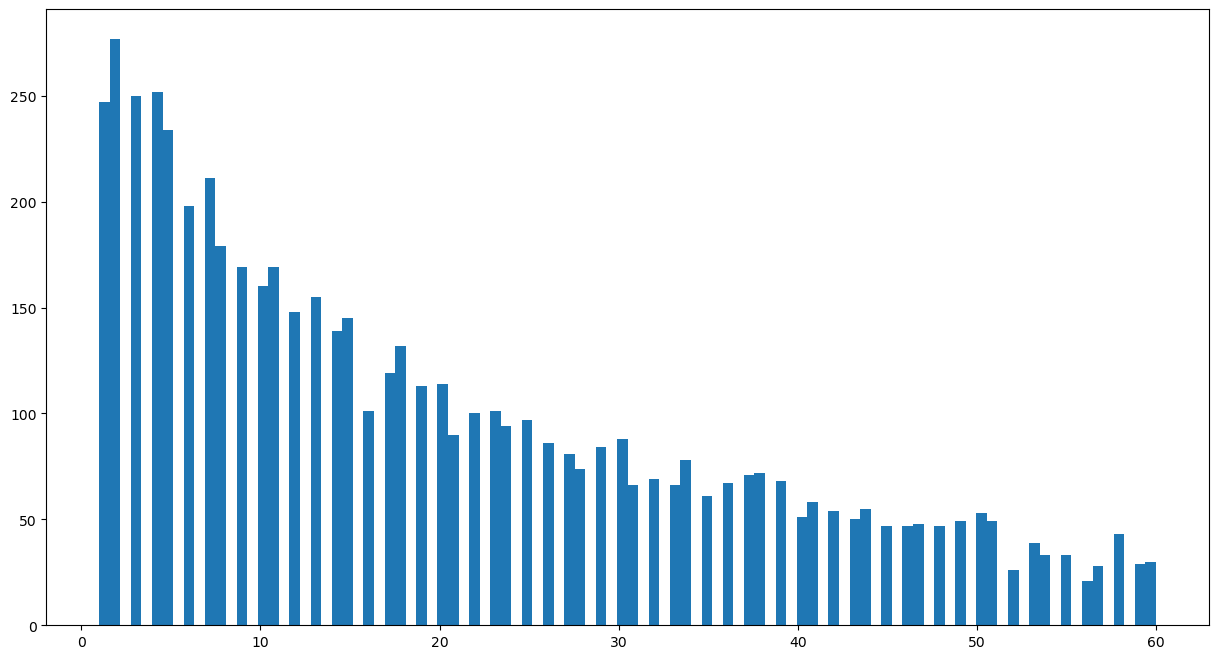

In [400]:
plt.figure(figsize=(15, 8))
plt.hist(df[(df['games_injured'] <= 60) & (df['games_injured'] >= 1)]['games_injured'], bins=100)
plt.show()

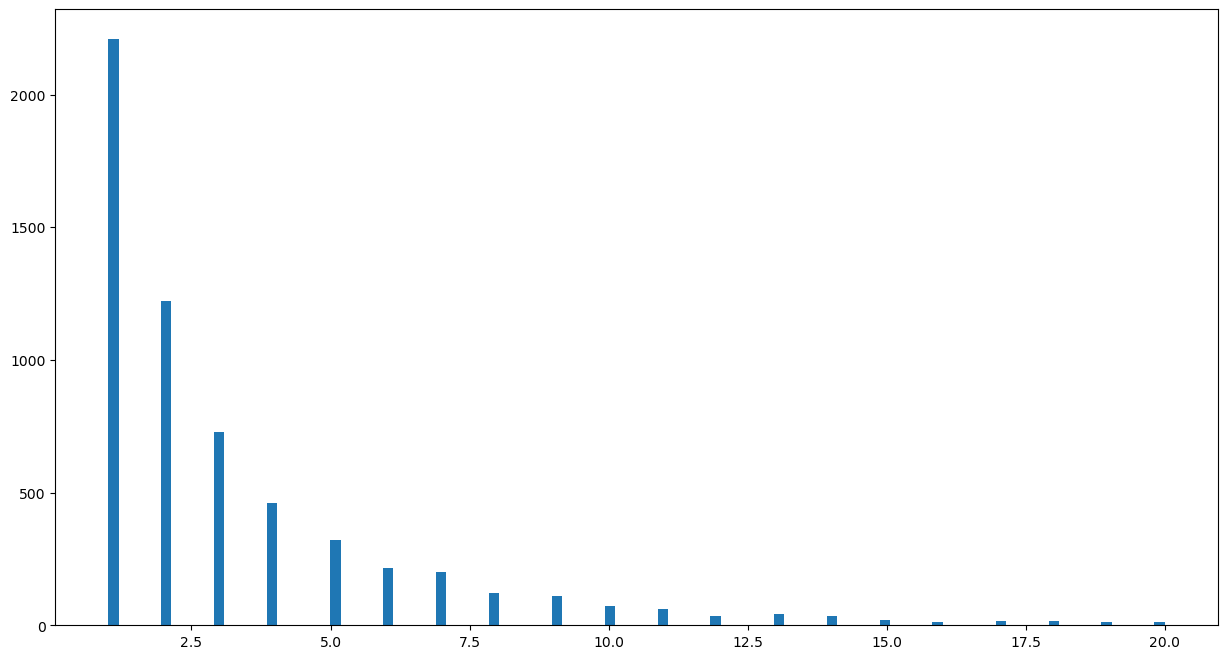

In [401]:
plt.figure(figsize=(15, 8))
plt.hist(df[(df['award'] <= 20) & (df['award'] >= 1)]['award'], bins=100)
plt.show()

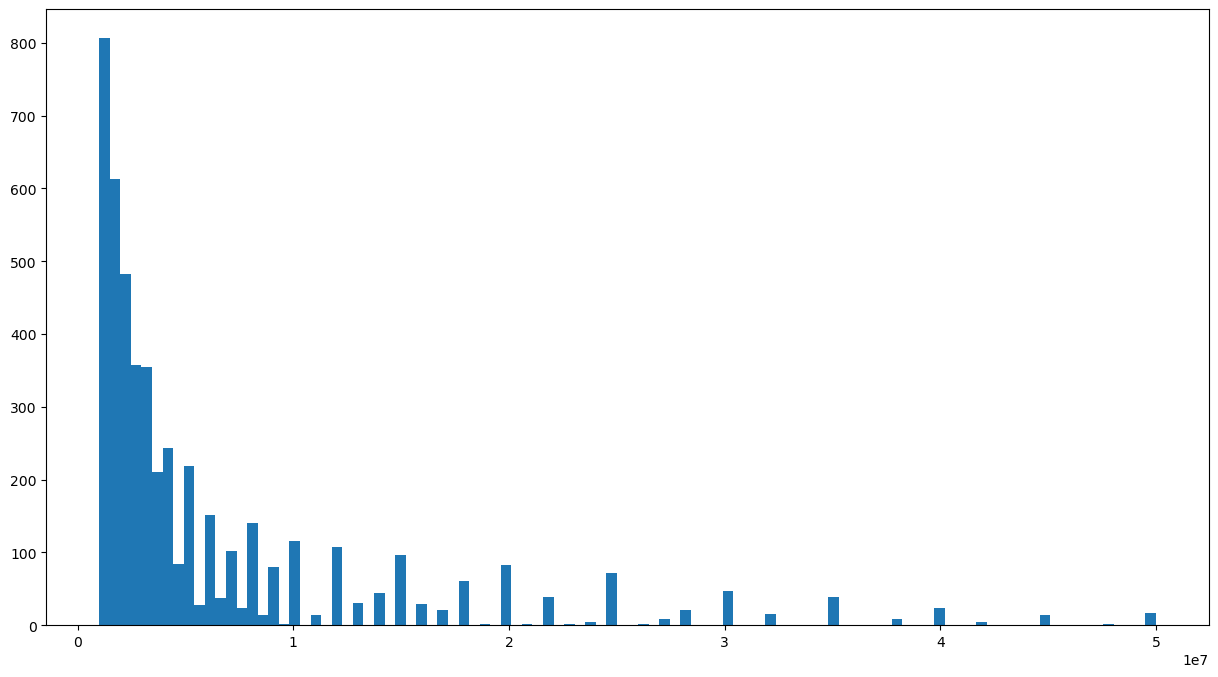

In [402]:
plt.figure(figsize=(15, 8))
plt.hist(df[(df['current_value'] <= 50000000) & (df['current_value'] >= 1000000)]['current_value'], bins=100)
plt.show()

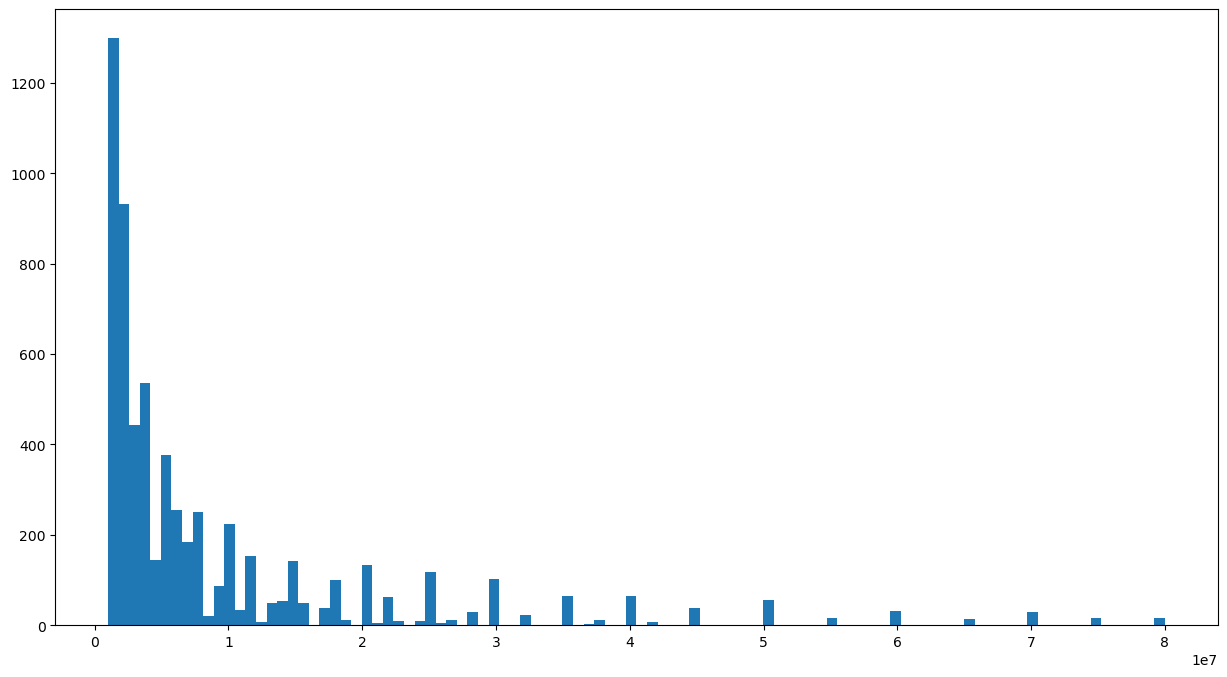

In [403]:
plt.figure(figsize=(15, 8))
plt.hist(df[(df['highest_value'] <= 80000000) & (df['highest_value'] >= 1000000)]['highest_value'], bins=100)
plt.show()


### 2. Feature engineering

In [404]:
df.shape

(10754, 19)

In [405]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded
0,Manchester United,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1
1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1


In [406]:
categorical_features

['team', 'position']

In [407]:
df = pd.get_dummies(df, columns=categorical_features)

In [408]:
df.shape

(10754, 407)

In [409]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,...,False,False,False,True,False,False,False,False,False,False
1,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,False,True,False,False,False,False,False,False


### 3. Feature selection:

In [410]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.834553
minutes played         0.420542
appearance             0.419656
award                  0.300454
                         ...   
position_Attack       -0.027709
position_midfield     -0.032972
age                   -0.050156
goals conceded        -0.063529
position_Goalkeeper   -0.077891
Name: current_value, Length: 407, dtype: float64


In [411]:
threshold = 0.25  # You can change this value based on your requirement

# Filter the correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'award', 'current_value',
       'highest_value'],
      dtype='object')

In [412]:
selected_features = ['appearance', 'minutes played', 'award', 'current_value',
       'highest_value']

In [413]:
df = df[selected_features]
df.head()

,appearance,minutes played,award,current_value,highest_value
0,104,9390,13,15000000,70000000
1,15,1304,1,1500000,22000000
2,4,292,4,600000,6000000
3,82,6408,9,50000000,50000000
4,63,5031,21,40000000,80000000


### 4. Prepare train and test data:

In [414]:
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [415]:
X.shape

(10754, 4)

## Buliding the Model:

In [416]:
model = LinearRegression()

## Train the Model:

In [417]:
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model:

In [418]:
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model:

In [419]:
model.coef_

array([-1067133.03751928,  1971711.7498413 , -1891462.23191045,
        8139862.89459497])

In [420]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-1.067133e+06
minutes played,1.971712e+06
award,-1.891462e+06
highest_value,8.139863e+06


In [421]:
print(model.intercept_) 

3622354.9924444957
